In [2]:
from qutip.wigner import qfunc
import numpy as np
from sklearn.metrics import accuracy_score

from qst_nn.models.classifier import Classifier
from qst_nn.data.preprocess import remove_data, remap_labels, normalize
from qst_nn.training.train_classifier import loss, optimizer
from qst_nn.utils import plot_confusion_matrix, plot_three_husimi, cat

import os

2022-11-10 12:56:33.748522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 12:56:36.289110: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 12:56:41.934454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-10 12:56:41.934818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [36]:
xgrid = 32
ygrid = 32

xvec = np.linspace(-5, 5, xgrid)
yvec = np.linspace(-5, 5, ygrid)

print(xvec)
print(yvec)

cat_state = qfunc(cat(32, 1, 1, mu=1), xvec, yvec, g=2)

[-5.         -4.67741935 -4.35483871 -4.03225806 -3.70967742 -3.38709677
 -3.06451613 -2.74193548 -2.41935484 -2.09677419 -1.77419355 -1.4516129
 -1.12903226 -0.80645161 -0.48387097 -0.16129032  0.16129032  0.48387097
  0.80645161  1.12903226  1.4516129   1.77419355  2.09677419  2.41935484
  2.74193548  3.06451613  3.38709677  3.70967742  4.03225806  4.35483871
  4.67741935  5.        ]
[-5.         -4.67741935 -4.35483871 -4.03225806 -3.70967742 -3.38709677
 -3.06451613 -2.74193548 -2.41935484 -2.09677419 -1.77419355 -1.4516129
 -1.12903226 -0.80645161 -0.48387097 -0.16129032  0.16129032  0.48387097
  0.80645161  1.12903226  1.4516129   1.77419355  2.09677419  2.41935484
  2.74193548  3.06451613  3.38709677  3.70967742  4.03225806  4.35483871
  4.67741935  5.        ]


In [47]:
print(cat_state) #quantum state on 32d Hilbert state is a 32x32 matrix

[[2.19072664e-19 4.96980728e-18 9.15637731e-17 ... 9.15637731e-17
  4.96980728e-18 2.19072664e-19]
 [2.60692651e-18 5.91389222e-17 1.08959578e-15 ... 1.08959578e-15
  5.91389222e-17 2.60692651e-18]
 [2.51916146e-17 5.71465590e-16 1.05292755e-14 ... 1.05292755e-14
  5.71465590e-16 2.51916146e-17]
 ...
 [2.51916146e-17 5.71465590e-16 1.05292755e-14 ... 1.05292755e-14
  5.71465590e-16 2.51916146e-17]
 [2.60692651e-18 5.91389222e-17 1.08959578e-15 ... 1.08959578e-15
  5.91389222e-17 2.60692651e-18]
 [2.19072664e-19 4.96980728e-18 9.15637731e-17 ... 9.15637731e-17
  4.96980728e-18 2.19072664e-19]]


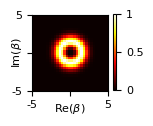

In [74]:
from qst_nn.utils import plot_husimi_directly

#affect display size on plotting image
xvec = np.linspace(-5, 5, xgrid)
yvec = np.linspace(-5, 5, ygrid)

cat_state = qfunc(cat(3, 2, 1, mu=2), xvec, yvec, g=2)
fig, ax = plot_husimi_directly(cat_state, cmap="hot")
plt.show()

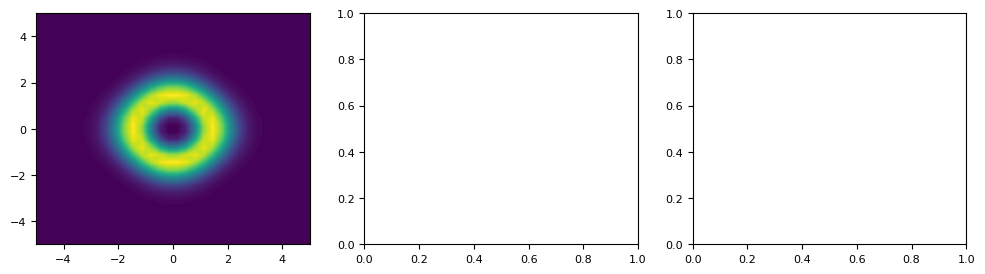

[[6.19962576e-19 1.11925054e-17 1.63556482e-16 1.94614689e-15
  1.90994076e-14 1.57023590e-13 1.09536471e-12 6.51357653e-12
  3.28523437e-11 1.38952569e-10 4.86699841e-10 1.39726034e-09
  3.26497779e-09 6.18416401e-09 9.47432939e-09 1.17289479e-08
  1.17289479e-08 9.47432939e-09 6.18416401e-09 3.26497779e-09
  1.39726034e-09 4.86699841e-10 1.38952569e-10 3.28523437e-11
  6.51357653e-12 1.09536471e-12 1.57023590e-13 1.90994076e-14
  1.94614689e-15 1.63556482e-16 1.11925054e-17 6.19962576e-19]]
[[1.11925054e-17 1.81784001e-16 2.39990535e-15 2.59274779e-14
  2.33241125e-13 1.79075952e-12 1.19961008e-11 7.05773314e-11
  3.59984876e-10 1.55521915e-09 5.56852274e-09 1.62812913e-08
  3.85557299e-08 7.36772287e-08 1.13468335e-07 1.40808304e-07
  1.40808304e-07 1.13468335e-07 7.36772287e-08 3.85557299e-08
  1.62812913e-08 5.56852274e-09 1.55521915e-09 3.59984876e-10
  7.05773314e-11 1.19961008e-11 1.79075952e-12 2.33241125e-13
  2.59274779e-14 2.39990535e-15 1.81784001e-16 1.11925054e-17]]
[[1.

In [46]:
class Data_generator():
    def __init__(self, 
                 class_list, 
                 return_dir):
        """
        Args:
            class_list (list): Path to the csv file with annotations.
            return_dir (string): Directory with all the images.
        """
        self.class_list = class_list
        self.return_dir = return_dir
    
    def make_cat_state(num_sample=1000):
        state = qfunc(cat(32, 1, 1, mu=1), xvec, yvec, g=2)
        writematrix(state, f) 
       
        
    state = qfunc(cat(32, 1, 1, mu=1), xvec, yvec, g=2)
    fig,axes = plt.subplots(1,3,figsize=(12,3))
    cont0  =axes[0].contourf(xvec,xvec,state,100)
    plt.show()
    
    #writematrix(state,f)
    
    import numpy as np
    
    mat = np.matrix(state)
    for line in mat:
        print (line)
    #with open('outfile.txt') as f:
     #   for line in mat:
      #      np.savetxt(f, line, fmt='%.2f')
            
    #file_contents = outfile.txt.read()
    #print (file_contents)

In [39]:
class QST_Test_Dataset(Dataset):
    """Dataset for qst training"""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        
        return sample

NameError: name 'Dataset' is not defined